In [17]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = pl.read_csv("~/PycharmProjects/explanaible-steam-nlp/data/dataset.csv")

In [4]:
data.schema

Schema([('app_id', Int64),
        ('app_name', String),
        ('review_text', String),
        ('review_score', Int64),
        ('review_votes', Int64)])

In [5]:
data.describe()

statistic,app_id,app_name,review_text,review_score,review_votes
str,f64,str,str,f64,f64
"""count""",6.417106e6,"""6233872""","""6409801""",6.417106e6,6.417106e6
"""null_count""",0.0,"""183234""","""7305""",0.0,0.0
"""mean""",227469.499959,null,null,0.639499,0.147245
"""std""",126045.06578,null,null,0.768792,0.35435
"""min""",10.0,""" 神明的一天世界-God's One Day World""","""I implore you to get a little…",-1.0,0.0
"""25%""",201810.0,null,null,1.0,0.0
"""50%""",239160.0,null,null,1.0,0.0
"""75%""",305620.0,null,null,1.0,0.0
"""max""",565340.0,"""拯救大魔王2 Rescue the Great Demon …","""󠀁󠀁󠀁󠀁󠀁""",1.0,1.0


# Eliminar Nulos
Eliminamos los nulos debido a que son las colummnas que contienen texto, es decir, no se pueden imputar de una manera sencilla para este analísis

In [6]:
data = data.drop_nulls()
data.describe()

statistic,app_id,app_name,review_text,review_score,review_votes
str,f64,str,str,f64,f64
"""count""",6.226728e6,"""6226728""","""6226728""",6.226728e6,6.226728e6
"""null_count""",0.0,"""0""","""0""",0.0,0.0
"""mean""",226694.093372,null,null,0.646493,0.14673
"""std""",125466.779858,null,null,0.76292,0.353837
"""min""",10.0,""" 神明的一天世界-God's One Day World""","""I implore you to get a little…",-1.0,0.0
"""25%""",201810.0,null,null,1.0,0.0
"""50%""",239140.0,null,null,1.0,0.0
"""75%""",304460.0,null,null,1.0,0.0
"""max""",563430.0,"""拯救大魔王2 Rescue the Great Demon …","""󠀁󠀁󠀁󠀁󠀁""",1.0,1.0


In [7]:
min_count = data.group_by('review_score').count().min().select('count').item()

print(f"\nEl tamaño de la clase más pequeña es: {min_count}")

# 2. Filtrar el DataFrame para balancearlo (submuestreo)
df = data.filter(
    pl.arange(0, pl.len()).shuffle().over('review_score') < min_count
)

print("\n--- Conteo del DataFrame Balanceado ---")
print(df['review_score'].value_counts(sort=True))

print("\n--- DataFrame Balanceado Resultante ---")
df.head()


El tamaño de la clase más pequeña es: 1100596


/tmp/ipykernel_13211/441806237.py:1: DeprecationWarning: `GroupBy.count` was renamed; use `GroupBy.len` instead
  min_count = data.group_by('review_score').count().min().select('count').item()



--- Conteo del DataFrame Balanceado ---
shape: (2, 2)
┌──────────────┬─────────┐
│ review_score ┆ count   │
│ ---          ┆ ---     │
│ i64          ┆ u32     │
╞══════════════╪═════════╡
│ 1            ┆ 1100596 │
│ -1           ┆ 1100596 │
└──────────────┴─────────┘

--- DataFrame Balanceado Resultante ---


app_id,app_name,review_text,review_score,review_votes
i64,str,str,i64,i64
10,"""Counter-Strike""",""" Easy to learn, hard to…",1,1
10,"""Counter-Strike""","""Counter-Strike: Ok, after 9 ye…",1,1
10,"""Counter-Strike""","""Every server is spanish or fre…",1,0
10,"""Counter-Strike""","""Fire in the Hole Simulator 199…",1,0
10,"""Counter-Strike""","""WARNING : DO NOT buy this game…",1,1


In [21]:
df1 = df.with_columns(
    review_len = pl.col("review_text").fill_null("").str.split(" ").list.len()
)

df1

app_id,app_name,review_text,review_score,review_votes,review_len
i64,str,str,i64,i64,u32
10,"""Counter-Strike""",""" Easy to learn, hard to…",1,1,24
10,"""Counter-Strike""","""Counter-Strike: Ok, after 9 ye…",1,1,174
10,"""Counter-Strike""","""Every server is spanish or fre…",1,0,15
10,"""Counter-Strike""","""Fire in the Hole Simulator 199…",1,0,6
10,"""Counter-Strike""","""WARNING : DO NOT buy this game…",1,1,17
…,…,…,…,…,…
99910,"""Puzzle Pirates""","""I really ove this game but it …",-1,0,104
99910,"""Puzzle Pirates""","""Used to play Puzzel Pirates 'w…",-1,0,89
99910,"""Puzzle Pirates""","""This game was aright, though a…",-1,0,57


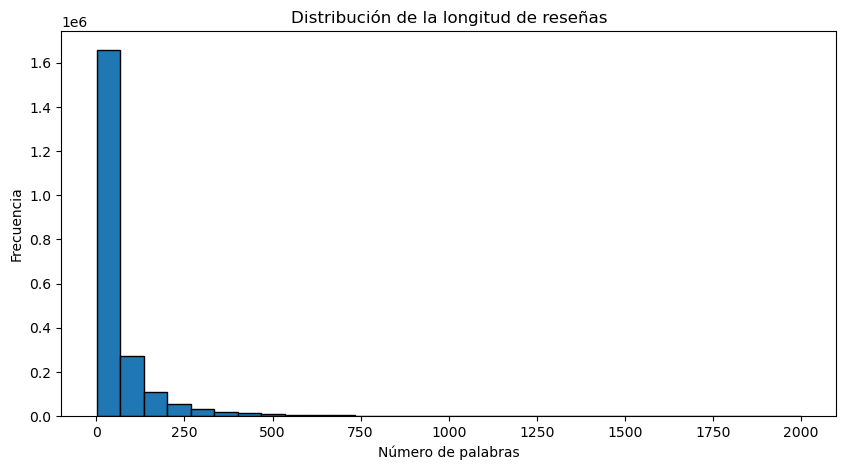

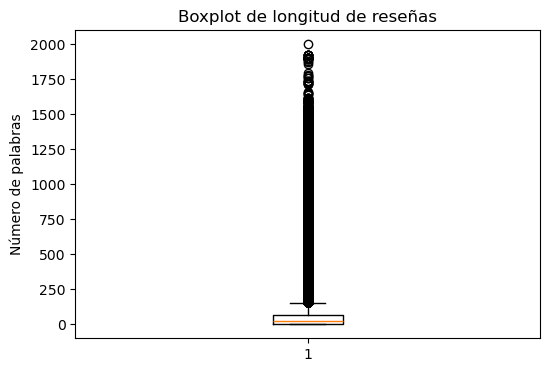

In [22]:
review_lens = df1["review_len"].to_list()

# Crear el histograma
plt.figure(figsize=(10, 5))
plt.hist(review_lens, bins=30, edgecolor='black')
plt.title("Distribución de la longitud de reseñas")
plt.xlabel("Número de palabras")
plt.ylabel("Frecuencia")
plt.show()

# Crear el boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(review_lens, vert=True)
plt.title("Boxplot de longitud de reseñas")
plt.ylabel("Número de palabras")
plt.show()

In [23]:
lengths = df1["review_len"].to_numpy()
p95 = np.percentile(lengths, 95)
p96 = np.percentile(lengths, 96)
p97 = np.percentile(lengths, 97)
p98 = np.percentile(lengths, 98)
p99 = np.percentile(lengths, 99)

print("Percentil 95:", p95)
print("Percentil 96:", p96)
print("Percentil 97:", p97)
print("Percentil 98:", p98)
print("Percentil 99:", p99)

Percentil 95: 257.0
Percentil 96: 296.0
Percentil 97: 350.0
Percentil 98: 433.0
Percentil 99: 597.0


In [24]:
df1.write_csv("~/PycharmProjects/explanaible-steam-nlp/data/Datos_Balanceados.csv", separator=";")
df1.shape

(2201192, 6)

In [25]:
# Columnas necesarias para el modelo
columnas_modelo = ["review_text", "review_score"]
df1.select(columnas_modelo).write_csv("~/PycharmProjects/explanaible-steam-nlp/data/Datos_Modelo.csv")
df1.select(columnas_modelo).shape

(2201192, 2)